In [85]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import scipy.stats
import dynesty
import corner
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc


plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[7,5]

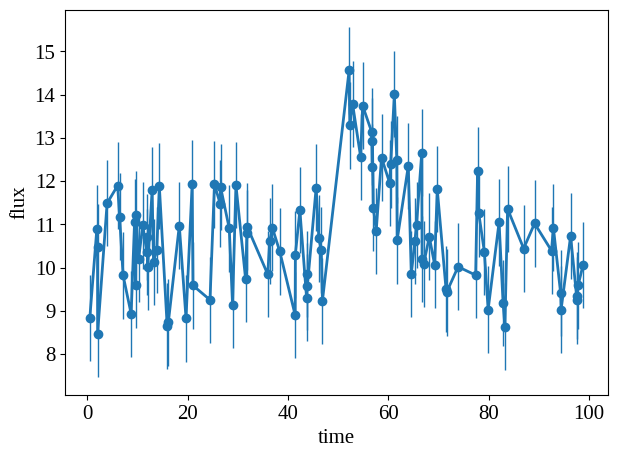

In [86]:
data=np.load('transient.npy')

time=data[:,0]
flux=data[:,1]
err=data[:,2]

plt.scatter(time, flux)
plt.errorbar(time, flux, err, lw=2, elinewidth=1)
plt.xlabel("time")
plt.ylabel("flux")
plt.show()

In [74]:
ndim=4

def burst(par, time):
    b, A, t_0, alpha = par
    y=np.empty(len(time))
    for i in range(len(time)):
        if time[i]<t_0:
            y[i]=b
        else:
            y[i]=b + A * np.exp(-alpha*(time[i]-t_0)) 
    return y

In [26]:
def prior_burst(u):         
    b = u[0]*50           
    A = u[1]*50                # A, b from uniform(0,50)    
    t_0 = u[2]*100              # to from uniform(0,100)    
    alpha = scipy.stats.loguniform.ppf(u[3], np.exp(-5), np.exp(5))     # ln(alpha) from uniform(-5, 5)
    
    par = np.array([b, A, t_0, alpha])   
    return(par)

def loglike_burst(par, time, flux, err):
    b, A, t_0, alpha = par
    model_burst = burst(par, time)
    return - 0.5 * np.sum((flux-model_burst)**2/(err**2))

In [27]:
sampler_burst = dynesty.NestedSampler(loglike_burst, prior_burst, ndim, logl_args=[time, flux, err])
sampler_burst.run_nested()
result_burst = sampler_burst.results

/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
1776it [00:02, 276.84it/s, bound: 0 | nc: 14 | ncall: 17348 | eff(%): 10.237 | loglstar:   -inf < -183.502 <    inf | logz: -191.424 +/-  0.120 | dlogz: 119.752 >  0.509]   /tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
1852it [00:03, 192.03it/s, bound: 1 | nc: 13 | ncall: 18590 | eff(%):  9.962 | loglstar:   -inf < -157.511 <    inf | logz: -165.751 +/-  0.121 | dlogz: 93.950 >  0.509] /tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where

2944it [00:10, 113.24it/s, bound: 15 | nc: 82 | ncall: 29144 | eff(%): 10.102 | loglstar:   -inf < -88.486 <    inf | logz: -95.671 +/-  0.111 | dlogz: 28.037 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
2965it [00:10, 92.98it/s, bound: 16 | nc: 10 | ncall: 29392 | eff(%): 10.088 | loglstar:   -inf < -88.381 <    inf | logz: -95.522 +/-  0.111 | dlogz: 27.846 >  0.509] /tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
3028it [00:10, 155.04it/s, bound: 16 | nc: 31 | ncall: 29942 | eff(%): 10.113 | loglstar:   -inf < -88.018 <    inf | logz: -95.122 +/-  0.111 | dlogz: 32.053 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in mul

3498it [00:18, 28.78it/s, bound: 33 | nc: 69 | ncall: 42735 | eff(%):  8.185 | loglstar:   -inf < -87.176 <    inf | logz: -93.779 +/-  0.109 | dlogz: 35.593 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
3521it [00:20, 24.37it/s, bound: 35 | nc: 11 | ncall: 44415 | eff(%):  7.928 | loglstar:   -inf < -87.164 <    inf | logz: -93.749 +/-  0.108 | dlogz: 35.517 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
3535it [00:20, 37.31it/s, bound: 35 | nc: 113 | ncall: 44977 | eff(%):  7.860 | loglstar:   -inf < -87.1

3784it [00:27, 27.17it/s, bound: 51 | nc: 290 | ncall: 58708 | eff(%):  6.445 | loglstar:   -inf < -87.092 <    inf | logz: -93.508 +/-  0.108 | dlogz: 34.919 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
3788it [00:28, 17.79it/s, bound: 52 | nc: 126 | ncall: 59258 | eff(%):  6.392 | loglstar:   -inf < -87.092 <    inf | logz: -93.506 +/-  0.108 | dlogz: 34.909 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
3796it [00:28, 19.13it/s, bound: 53 | nc: 103 | ncall: 60014 | eff(%):  6.325 | loglstar:   -inf < -87

3902it [00:35,  9.84it/s, bound: 70 | nc: 577 | ncall: 75217 | eff(%):  5.188 | loglstar:   -inf < -86.998 <    inf | logz: -93.442 +/-  0.107 | dlogz: 34.617 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
3904it [00:35,  9.53it/s, bound: 71 | nc: 28 | ncall: 75517 | eff(%):  5.170 | loglstar:   -inf < -86.993 <    inf | logz: -93.441 +/-  0.107 | dlogz: 34.612 >  0.509] /tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
3907it [00:35, 10.82it/s, bound: 71 | nc: 682 | ncall: 76328 | eff(%):  5.119 | loglstar:   -inf < -86.989 <    inf | logz: -93.440 +/-  0.107 | dlogz: 34.605 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in mul

4039it [00:43, 20.51it/s, bound: 88 | nc: 78 | ncall: 90345 | eff(%):  4.471 | loglstar:   -inf < -86.271 <    inf | logz: -93.362 +/-  0.107 | dlogz: 35.409 >  0.509] /tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
4050it [00:43, 26.41it/s, bound: 89 | nc: 146 | ncall: 91172 | eff(%):  4.442 | loglstar:   -inf < -86.169 <    inf | logz: -93.354 +/-  0.107 | dlogz: 35.379 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
4072it [00:44, 42.45it/s, bound: 90 | nc: 192 | ncall: 92202 | eff(%):  4.416 | loglstar:   -inf < -85

4244it [00:51, 27.90it/s, bound: 106 | nc: 98 | ncall: 104797 | eff(%):  4.050 | loglstar:   -inf < -83.619 <    inf | logz: -92.906 +/-  0.114 | dlogz: 34.547 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
4249it [00:51, 24.71it/s, bound: 107 | nc: 1 | ncall: 105073 | eff(%):  4.044 | loglstar:   -inf < -83.543 <    inf | logz: -92.883 +/-  0.114 | dlogz: 34.514 >  0.509] /tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in multiply
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
4253it [00:51, 24.57it/s, bound: 107 | nc: 554 | ncall: 106053 | eff(%):  4.010 | loglstar:   -inf < -83.463 <    inf | logz: -92.864 +/-  0.114 | dlogz: 34.487 >  0.509]/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in exp
  return np.where(time<t_0,b,b+A*np.exp(-alpha*(time-t_0)))
/tmp/ipykernel_3104/3678011.py:5: RuntimeWarning: overflow encountered in

7750it [01:09, 111.97it/s, +500 | bound: 155 | nc: 1 | ncall: 143323 | eff(%):  5.776 | loglstar:   -inf < -48.757 <    inf | logz: -63.464 +/-  0.168 | dlogz:  0.001 >  0.509]


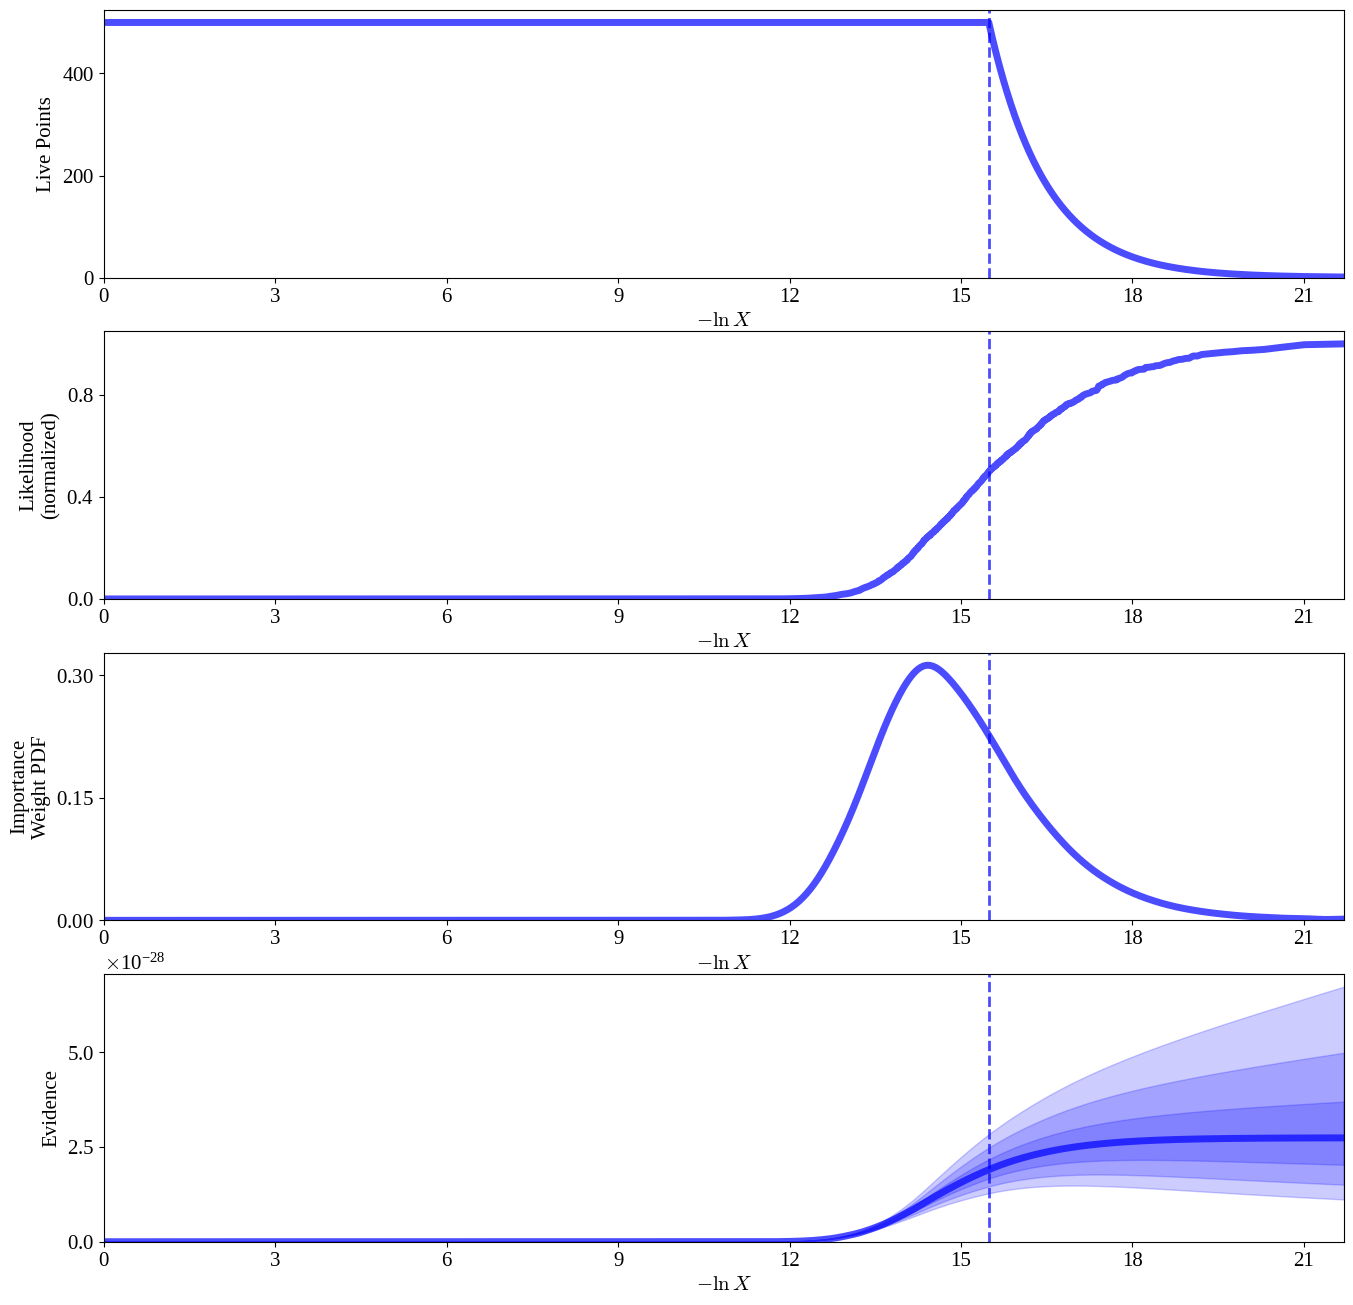

In [70]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(result_burst)

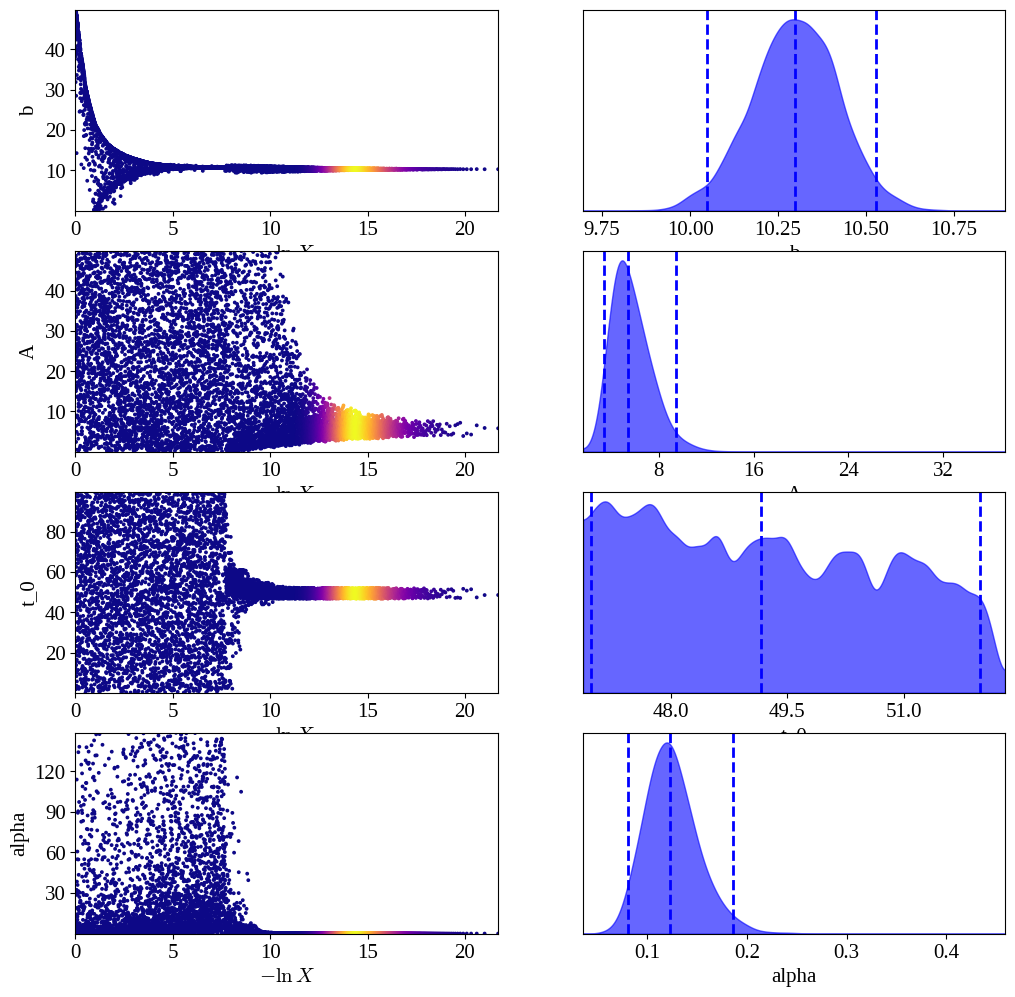

In [56]:
labels_burst = ["b","A","t_0","alpha"]

tfig, taxes = dyplot.traceplot(result_burst, labels=labels_burst)

In [38]:
samples_burst = result_burst.samples
weights_burst = np.exp(result_burst.logwt - result_burst.logz[-1])

samples_eq_burst = dyfunc.resample_equal(samples_burst, weights_burst)

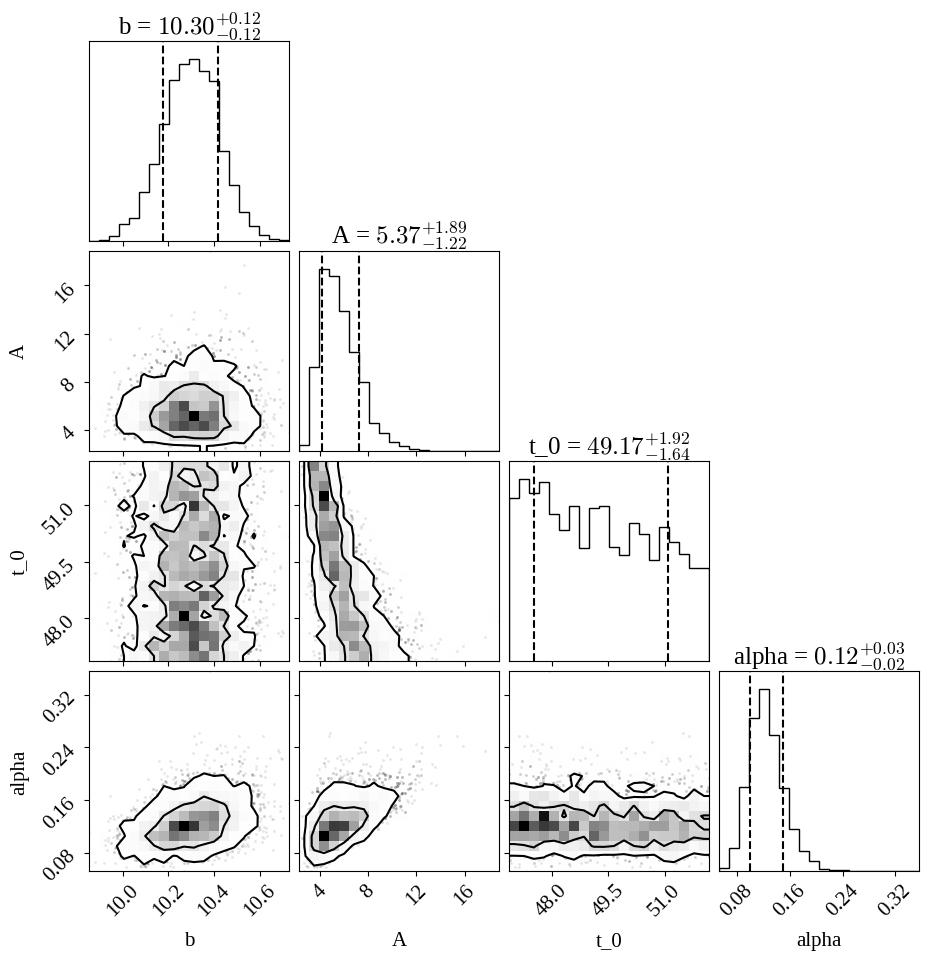

In [57]:
fig = corner.corner(samples_eq_burst, labels=labels_burst, levels=[0.68,0.95], quantiles=[0.16, 0.84], show_titles=True)

In [58]:
quantiles_burst = [dyfunc.quantile(samps, [0.05, 0.5, 0.95], weights=weights_burst)
             for samps in samples_burst.T]
for q,l in zip(quantiles_burst,labels_burst):
    low,med,up=q
    print(l,"=",str(round(med,2)),"+",str(round(up-med,2)),"-",str(round(med-low,2)))

b = 10.3 + 0.2 - 0.21
A = 5.38 + 3.25 - 1.78
t_0 = 49.16 + 2.63 - 2.1
alpha = 0.12 + 0.05 - 0.04


In [41]:
# Gaussian model

def gauss_model(par, time):
    b, A, t_0, sigma = par 
    return b+A*np.exp(-(((time-t_0)/sigma)**2 ) / 2)

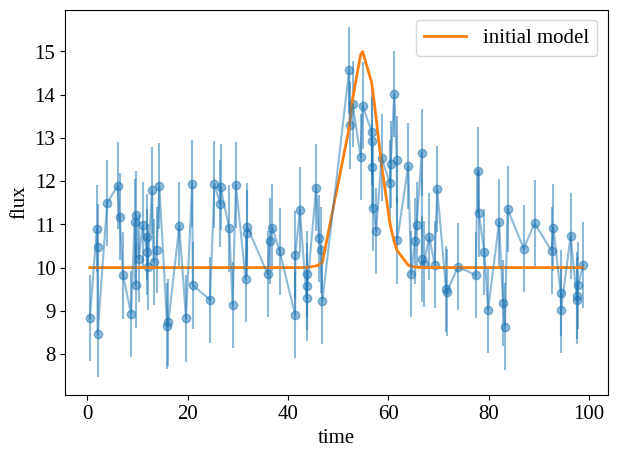

In [87]:
#fit the data with the gaussian model to find reasonable priors

b, A, t_0, sigma = 10, 5, 55, 3
par = [b, A, t_0, sigma]

flux_model_gauss = gauss_model(par, time)

plt.scatter(time, flux, alpha=0.5)
plt.errorbar(time, flux, err, alpha=0.5)
plt.plot(time, flux_model_gauss, label='initial model', lw=2)
plt.legend()
plt.ylabel('flux')
plt.xlabel('time')
plt.show()

In [54]:
def prior_gauss(u):         
    b = u[0]*50           
    A = u[1]*50                # A, b from uniform(0,50)    
    t_0 = u[2]*100              # to from uniform(0,100)    
    sigma = scipy.stats.loguniform.ppf(u[3], np.exp(-2), np.exp(2))     # ln(sigma) from uniform(-2, 2)
    
    par = np.array([b, A, t_0, sigma])   
    return(par)

def loglike_gauss(par, time, flux, err):
    b, A, t_0, sigma = par
    model_gauss = gauss_model(par, time)
    return - 0.5 * np.sum((flux-model_gauss)**2/(err**2))

In [59]:
sampler_gauss = dynesty.NestedSampler(loglike_gauss, prior_gauss, ndim, logl_args=[time, flux, err])
sampler_gauss.run_nested()
result_gauss = sampler_gauss.results

8009it [00:44, 179.56it/s, +500 | bound: 100 | nc: 1 | ncall: 98463 | eff(%):  8.686 | loglstar:   -inf < -52.435 <    inf | logz: -67.720 +/-  0.175 | dlogz:  0.001 >  0.509]


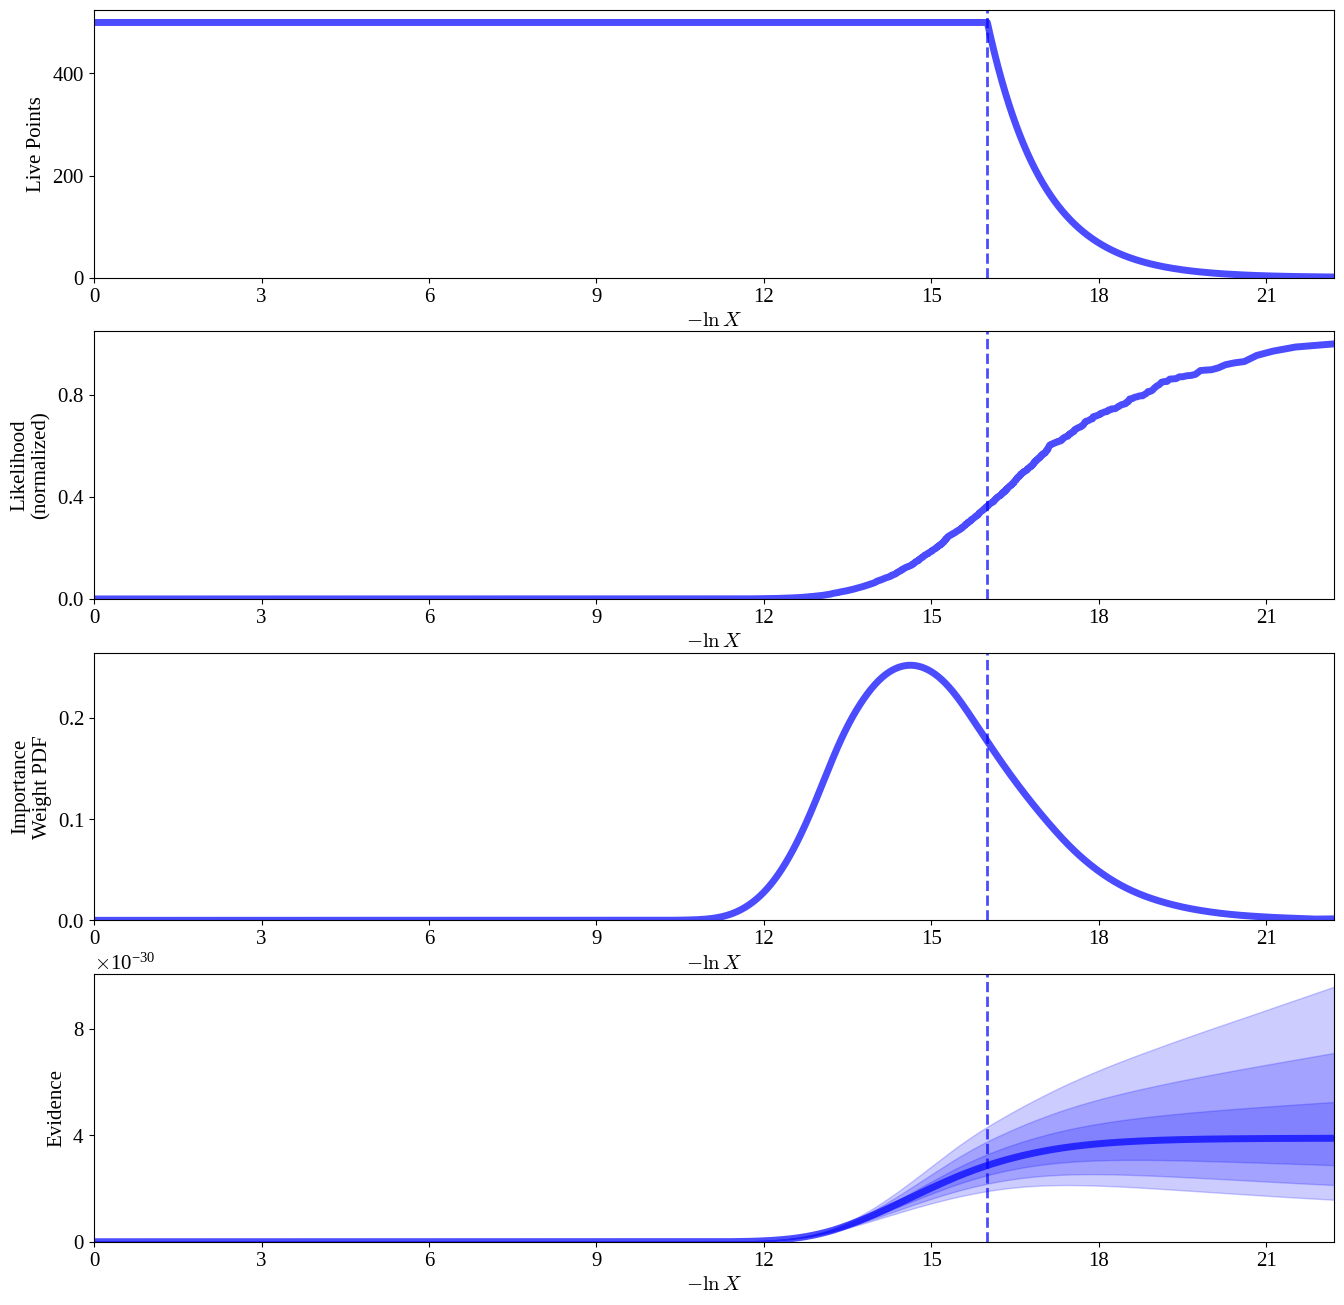

In [60]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(result_gauss)

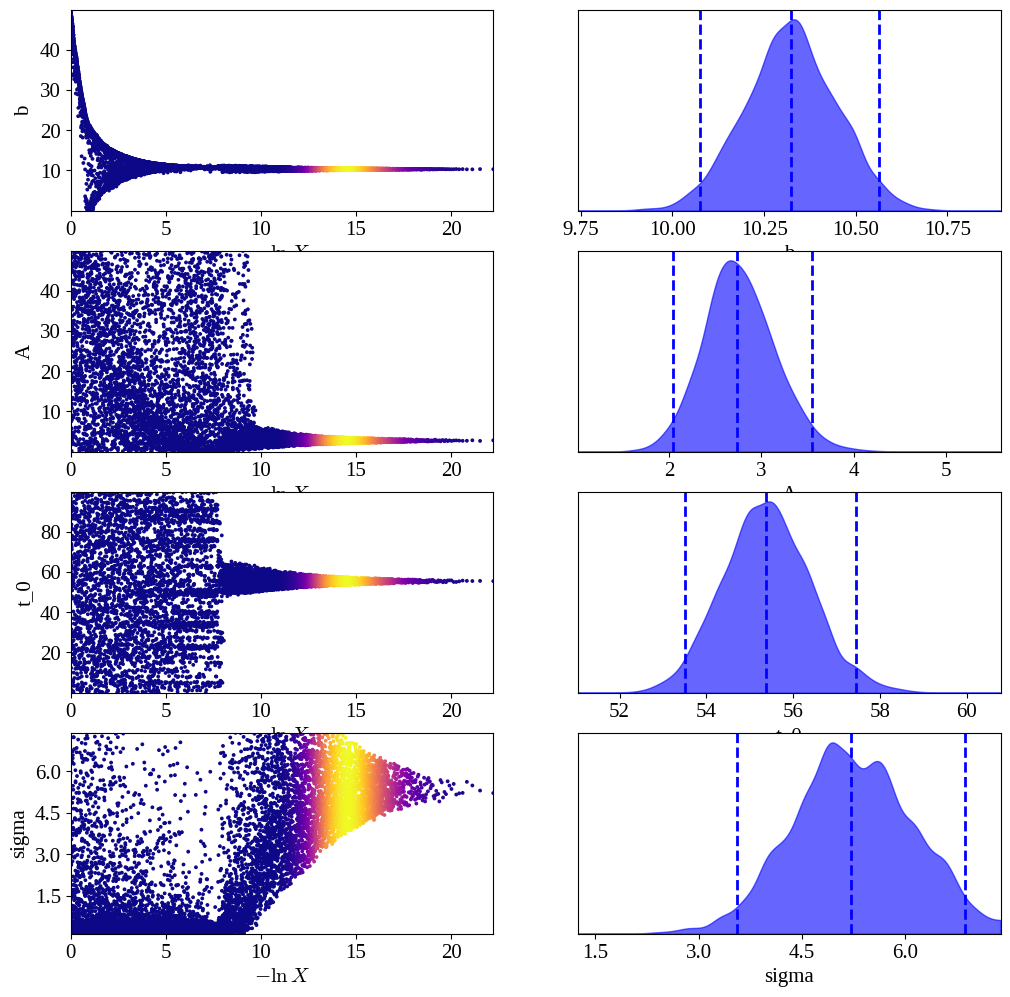

In [62]:
labels_gauss = ["b","A","t_0","sigma"]

tfig, taxes = dyplot.traceplot(result_gauss, labels=labels_gauss)

In [65]:
samples_gauss = result_gauss.samples
weights_gauss = np.exp(result_gauss.logwt - result_gauss.logz[-1])

samples_eq_gauss = dyfunc.resample_equal(samples_gauss, weights_gauss)

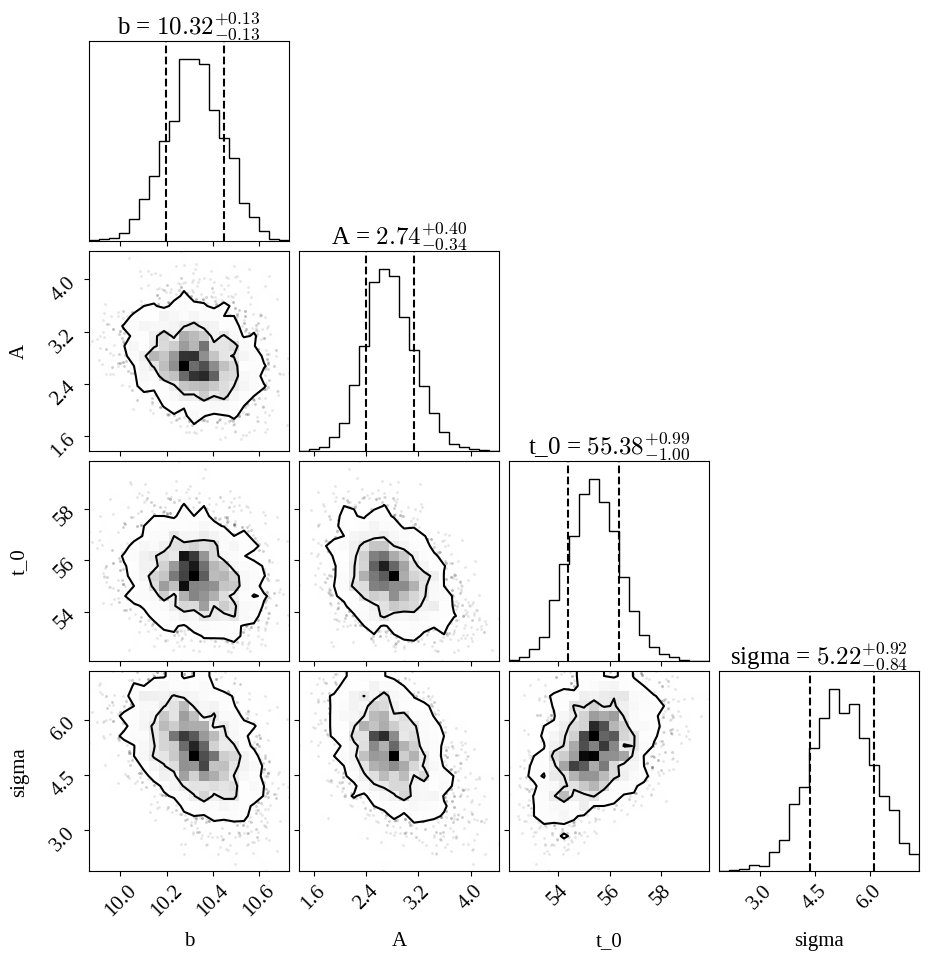

In [66]:
fig = corner.corner(samples_eq_gauss, labels=labels_gauss, levels=[0.68,0.95], quantiles=[0.16, 0.84], show_titles=True)

In [67]:
quantiles_gauss = [dyfunc.quantile(samps, [0.05, 0.5, 0.95], weights=weights_gauss)
             for samps in samples_gauss.T]
for q,l in zip(quantiles_gauss,labels_gauss):
    low,med,up=q
    print(l,"=",str(round(med,2)),"+",str(round(up-med,2)),"-",str(round(med-low,2)))

b = 10.32 + 0.2 - 0.21
A = 2.74 + 0.69 - 0.57
t_0 = 55.38 + 1.67 - 1.61
sigma = 5.21 + 1.44 - 1.36


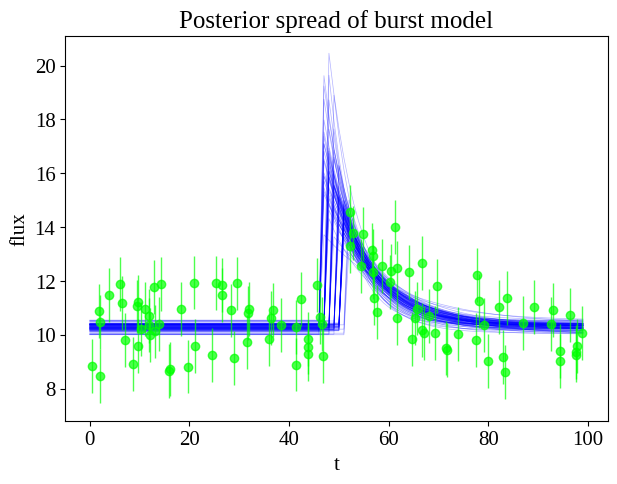

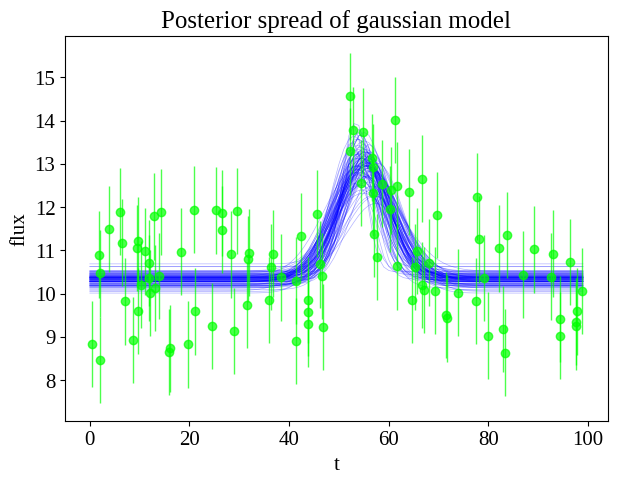

In [82]:
# model comparison

burst100 = samples_eq_burst[np.random.choice(range(len(samples_eq_burst)), 100)]
gauss100 = samples_eq_gauss[np.random.choice(range(len(samples_eq_gauss)), 100)]
t = np.linspace(0,100,100)

flux_burst_model = np.array([burst(par, t) for par in burst100])

for i in range(len(flux_burst_model)):
    plt.plot(flux_burst_model[i], alpha=0.3, color='blue', lw=0.5)
    plt.title('Posterior spread of burst model')
    plt.xlabel('t')
    plt.ylabel('flux')

plt.errorbar(time, flux, err, lw=2, elinewidth=1, fmt='o', color='lime', alpha=0.7)
plt.show()

flux_gauss_model = np.array([gauss_model(par, t) for par in gauss100])

for i in range(len(flux_gauss_model)):
    plt.plot(flux_gauss_model[i], alpha=0.3, color='blue', lw=0.5)
    plt.title('Posterior spread of gaussian model')
    plt.xlabel('t')
    plt.ylabel('flux')

plt.errorbar(time, flux, err, lw=2, elinewidth=1, fmt='o', color='lime', alpha=0.7)
plt.show()

In [84]:
evidence_burst = np.exp(result_burst.logz[-1])
evidence_gauss = np.exp(result_gauss.logz[-1])

Bayes_factor = evidence_burst/evidence_gauss

print(Bayes_factor)

# the burst model fits better the data

70.5168329222584
